# AirBnB Listing Analysis

       # Analyze AirBnB listings in Paris to determine the impact of recent regulations

 # Importing  Libraries and Data

In [1]:
import pandas as pd

In [2]:
listing = pd.read_csv(r"C:\Users\HP\Desktop\Maven Analytics\Airbnb Data\Listings.csv", 
                      encoding="ISO-8859-1",
                     low_memory =False,
                     parse_dates = ["host_since"])

# OBJECTIVE 1
  
   Profile & QA the data
   Your first objective is to read in the AirBnB listings data, calculate basic profiling metrics, change column datatypes as  
   necessary, and filter down to only Paris Listings.


1. Import/Open the Listings.csv file

2. Cast any date columns as a datetime format

3. Filter the data down to rows where the city is Paris, and keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’,
   ‘accommodates’, and ‘price’

4. QA the Paris listings data: check for missing values, and calculate the minimum, maximum, and average for each numeric field

In [3]:
listing.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [4]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279539 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [5]:
listing["host_since"]= pd.to_datetime(listing["host_since"])

In [6]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279539 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [7]:
paris_listing = (listing.query("city == 'Paris'").loc[:,{"host_since","neighbourhood","city","accommodates","price"}])

C:\Users\HP\AppData\Local\Temp\ipykernel_10424\488341119.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  paris_listing = (listing.query("city == 'Paris'").loc[:,{"host_since","neighbourhood","city","accommodates","price"}])


In [8]:
paris_listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   neighbourhood  64690 non-null  object        
 1   city           64690 non-null  object        
 2   host_since     64657 non-null  datetime64[ns]
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [9]:
paris_listing.isna().sum()

neighbourhood     0
city              0
host_since       33
accommodates      0
price             0
dtype: int64

In [10]:
paris_listing.describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


In [11]:
paris_listing.query("accommodates == 0").count()

neighbourhood    54
city             54
host_since       54
accommodates     54
price            54
dtype: int64

In [12]:
paris_listing.query("accommodates == 0")

,neighbourhood,city,host_since,accommodates,price
98209,Pantheon,Paris,2020-07-20,0,0
203257,Batignolles-Monceau,Paris,2020-02-04,0,0
203258,Opera,Paris,2016-10-17,0,0
203259,Luxembourg,Paris,2020-04-24,0,0
203260,Vaugirard,Paris,2020-04-24,0,0
203261,Batignolles-Monceau,Paris,2020-07-15,0,0
203263,Palais-Bourbon,Paris,2016-06-07,0,0
203264,Pantheon,Paris,2020-09-08,0,0
203265,Vaugirard,Paris,2020-09-21,0,0
203267,Observatoire,Paris,2020-10-29,0,0


In [13]:
paris_listing.query("price == 0").count()

neighbourhood    62
city             62
host_since       62
accommodates     62
price            62
dtype: int64

In [14]:
paris_listing.query("price == 0")

,neighbourhood,city,host_since,accommodates,price
98209,Pantheon,Paris,2020-07-20,0,0
203257,Batignolles-Monceau,Paris,2020-02-04,0,0
203258,Opera,Paris,2016-10-17,0,0
203259,Luxembourg,Paris,2020-04-24,0,0
203260,Vaugirard,Paris,2020-04-24,0,0
...,...,...,...,...,...
208881,Pantheon,Paris,2020-10-22,0,0
208882,Enclos-St-Laurent,Paris,2020-11-26,0,0
208883,Vaugirard,Paris,2020-11-26,0,0
208884,Vaugirard,Paris,2020-12-21,0,0


In [15]:
paris_listing.query("accommodates == 0 and price == 0")

,neighbourhood,city,host_since,accommodates,price
98209,Pantheon,Paris,2020-07-20,0,0
203257,Batignolles-Monceau,Paris,2020-02-04,0,0
203258,Opera,Paris,2016-10-17,0,0
203259,Luxembourg,Paris,2020-04-24,0,0
203260,Vaugirard,Paris,2020-04-24,0,0
203261,Batignolles-Monceau,Paris,2020-07-15,0,0
203263,Palais-Bourbon,Paris,2016-06-07,0,0
203264,Pantheon,Paris,2020-09-08,0,0
203265,Vaugirard,Paris,2020-09-21,0,0
203267,Observatoire,Paris,2020-10-29,0,0


In [16]:
paris_listing.query("accommodates == 0 and price == 0").count()

neighbourhood    54
city             54
host_since       54
accommodates     54
price            54
dtype: int64

# OBJECTIVE 2

   Prepare the data for visualization
   Your second objective is to produce DataFrames that will be used in visualizations by aggregating and manipulating the 
   listings data in several ways.


1. Create a table named paris_listings_neighbourhood that groups Paris listings by 'neighbourhood' and calculates the mean
   price (sorted low to high)

2. Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the
   ‘accommodations’ column, and add the mean price for each value of ‘accommodates’ (sorted low to high)

3. Create a table called paris_listings_over_time grouped by the ‘host_since’ year, and calculate the average price and count
   of rows representing the number of new hosts

In [20]:
paris_listing_neighbourhood =(
paris_listing.groupby("neighbourhood").agg({ "price" : "mean" }).sort_values("price"))
                                           
paris_listing_neighbourhood.head()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459


In [30]:
paris_listing_neighbourhood          #.tail()

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459
Gobelins,98.110184
Observatoire,101.866801
Batignolles-Monceau,102.612702
Enclos-St-Laurent,102.967156


In [22]:
paris_listing_accommodates = (
  paris_listing.query("neighbourhood == 'Elysee'").groupby("accommodates").agg({"price" : "mean"}).sort_values("price"))

In [23]:
paris_listing_accommodates.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


In [24]:
paris_listing_accommodates.tail()

,price
accommodates,
12,529.625
16,800.000
11,805.000
13,842.500
14,971.000


In [25]:
paris_listing_accommodates = (
  paris_listing.query("neighbourhood == 'Elysee'")
    .groupby("accommodates")
    .agg({"price" : "mean", "accommodates" : "count"})
    .sort_values("price"))

In [26]:
paris_listing_accommodates.head()

,price,accommodates
accommodates,,
0,0.000000,6
1,79.522222,90
3,152.828767,146
2,155.103352,716
4,212.096070,458


In [27]:
paris_listing_accommodates.tail()

,price,accommodates
accommodates,,
12,529.625,8
16,800.000,1
11,805.000,4
13,842.500,2
14,971.000,2


In [28]:
paris_listing_over_time = (
        paris_listing.
          set_index("host_since")
           .resample("Y")
         .agg({"neighbourhood" : "count", "price" : "mean"}))

In [29]:
paris_listing_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


In [49]:
paris_listing_over_time.tail()

,neighbourhood,price
host_since,,
2017-12-31,4585,108.658888
2018-12-31,4294,138.209362
2019-12-31,5694,129.757113
2020-12-31,3412,141.456038
2021-12-31,133,93.488722


# OBJECTIVE 3

     Visualize the data and summarize findings
     Your final objective is to build visuals to show the number of new hosts by year, overall average price by year and
     neighborhood, and average price for various types of listings in Paris' most expensive neighborhood.

1. Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed

Show hint
Create a horizontal bar chart of the average price by ‘accommodates’ in Paris’ most expensive neighborhood, and make sure to add a title and change axis labels as needed

Show hint
Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title, and change axis labels as needed

Show hint
Based on your findings, what insights do you have about the impact of the 2015 regulations on new hosts and prices?

Show hint
BONUS: Create a dual axis line chart to show both new hosts and average price over time

Show hint


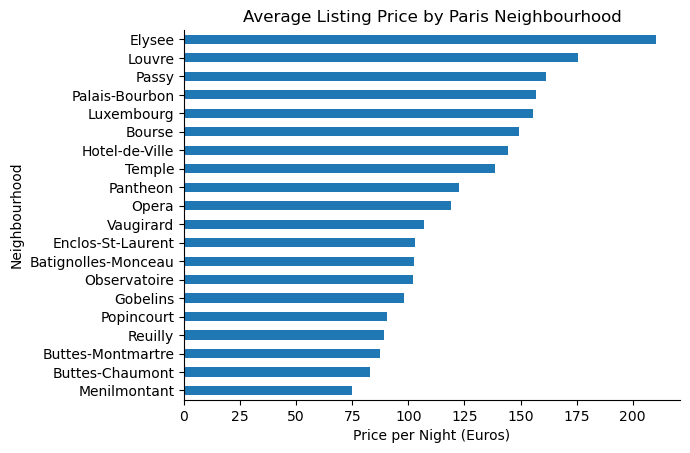

In [60]:
import seaborn as sns

(paris_listing_neighbourhood.plot.barh(title ="Average Listing Price by Paris Neighbourhood",xlabel ="Price per Night (Euros)",
                                       ylabel ="Neighbourhood", legend= None))

sns.despine()

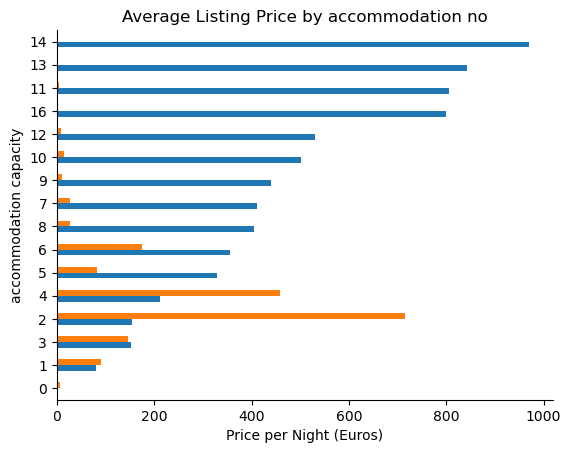

In [62]:
(paris_listing_accommodates.plot.barh(title ="Average Listing Price by accommodation no",xlabel ="Price per Night (Euros)",
                                       ylabel ="accommodation capacity", legend= None))

sns.despine()

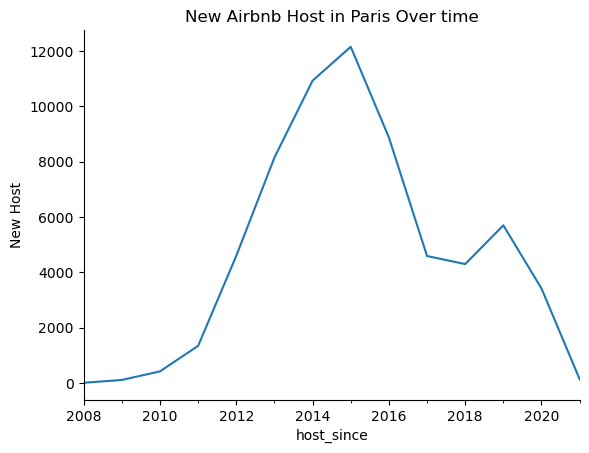

In [69]:
paris_listing_over_time["neighbourhood"].plot(
 ylabel = "New Host",
title = "New Airbnb Host in Paris Over time")

sns.despine()

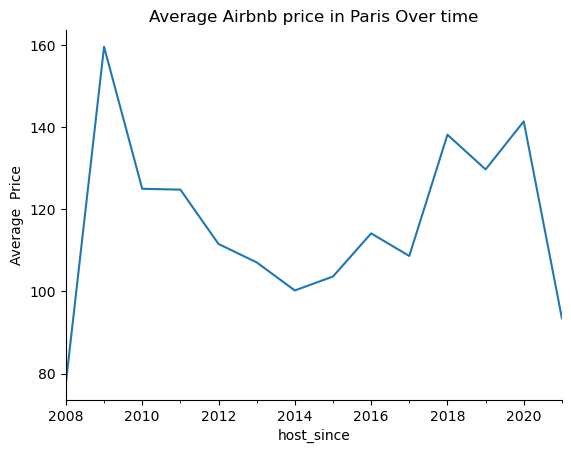

In [70]:
paris_listing_over_time["price"].plot(
 ylabel = "Average  Price",
title = "Average Airbnb price in Paris Over time")

sns.despine()

In [71]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'New_Host')

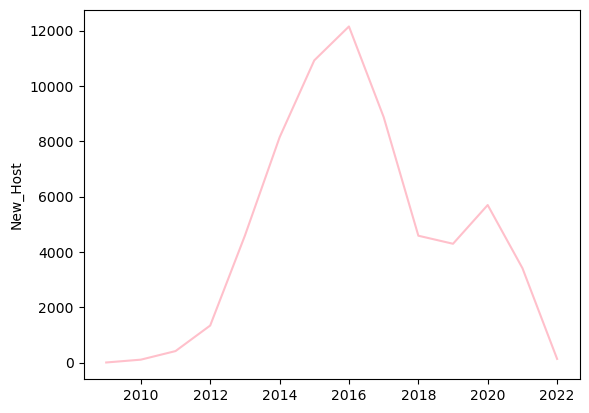

In [75]:
fig, ax = plt.subplots()

ax.plot(
paris_listing_over_time.index,paris_listing_over_time["neighbourhood"],label = "New Host", c ="Pink")

ax.set_ylabel("New_Host")

Text(0.5, 1.0, '2015 Regulation Lead to Fewer  new host , higher prices')

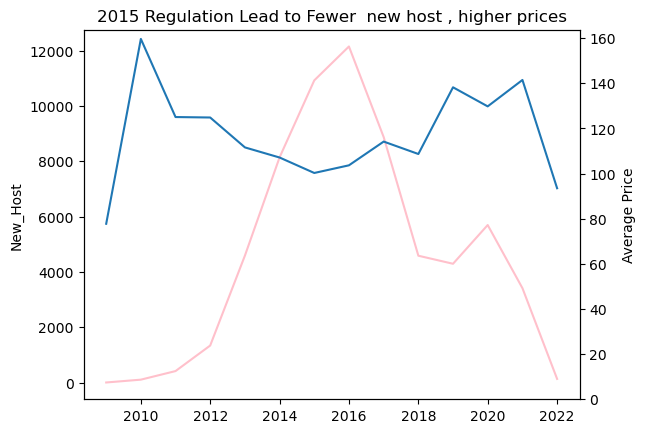

In [85]:
fig, ax = plt.subplots()

ax.plot(
paris_listing_over_time.index,paris_listing_over_time["neighbourhood"],label = "New Host", c ="Pink")

ax.set_ylabel("New_Host")

ax2 = ax.twinx()

ax2.plot(
paris_listing_over_time.index,paris_listing_over_time["price"],label = "Average Price")

ax2.set_ylim(0)

ax2.set_ylabel("Average Price")

ax2.set_title("2015 Regulation Lead to Fewer  new host , higher prices")

Text(0.5, 1.0, '2015 Regulation Lead to Fewer  new host , higher prices')

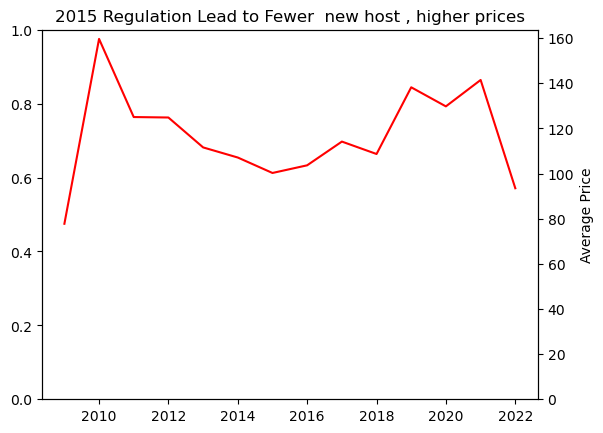

In [86]:
fig, ax = plt.subplots()

# ax.plot(
# paris_listing_over_time.index,paris_listing_over_time["neighbourhood"],label = "New Host", c ="Pink")

# ax.set_ylabel("New_Host")

ax2 = ax.twinx()

ax2.plot(
paris_listing_over_time.index,paris_listing_over_time["price"],label = "Average Price", c = "Red")

ax2.set_ylim(0)

ax2.set_ylabel("Average Price")

ax2.set_title("2015 Regulation Lead to Fewer  new host , higher prices")

=============================================================================================================